In [3]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
from scipy.stats import zscore
warnings.filterwarnings('ignore')

In [4]:
#loading data
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')


In [5]:
df[df.columns[:11]]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407
...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000


In [6]:
df[df.columns[11:]]

,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


I am deleting station,date ,latitude and longitude as I think they dont make any sence here to predict temperature

In [7]:
#deleting unwanted features
df.drop(columns=['station','Date','lat','lon'],axis=1,inplace=True)

In [8]:
#check metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      7682 non-null   float64
 1   Present_Tmin      7682 non-null   float64
 2   LDAPS_RHmin       7677 non-null   float64
 3   LDAPS_RHmax       7677 non-null   float64
 4   LDAPS_Tmax_lapse  7677 non-null   float64
 5   LDAPS_Tmin_lapse  7677 non-null   float64
 6   LDAPS_WS          7677 non-null   float64
 7   LDAPS_LH          7677 non-null   float64
 8   LDAPS_CC1         7677 non-null   float64
 9   LDAPS_CC2         7677 non-null   float64
 10  LDAPS_CC3         7677 non-null   float64
 11  LDAPS_CC4         7677 non-null   float64
 12  LDAPS_PPT1        7677 non-null   float64
 13  LDAPS_PPT2        7677 non-null   float64
 14  LDAPS_PPT3        7677 non-null   float64
 15  LDAPS_PPT4        7677 non-null   float64
 16  DEM               7752 non-null   float64


Total 7752 rows and 25 columns  
one feature with object dtype other are float data type   
too many features has null values

In [9]:
#check null values
df.isna().sum()

Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [10]:
nan_f=df.columns.tolist()

In [11]:
for i in ['DEM','Slope','Solar radiation']:
  nan_f.remove(i)

In [12]:
#handling null values using knnimputer
knnimpt=KNNImputer()
df[nan_f]=knnimpt.fit_transform(df[nan_f])

In [13]:
#check statistical propertise of data
df[df.columns[:11]].describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,29.767665,23.229518,56.721081,88.363073,29.638419,23.533536,7.090241,62.563355,0.367759,0.354956,0.317236
std,2.964666,2.410158,14.614631,7.169533,2.946932,2.346273,2.175503,33.620914,0.261590,0.257335,0.249569
min,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000
25%,27.800000,21.700000,45.992043,84.235004,27.693091,22.114651,5.681878,37.464096,0.147747,0.140627,0.102814
50%,29.900000,23.400000,54.993261,89.750568,29.744213,23.778855,6.541038,57.159677,0.314712,0.310864,0.260192
75%,32.000000,24.900000,67.038254,93.712091,31.738718,25.168865,8.008097,84.176070,0.571734,0.555216,0.494131
max,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789


In [14]:
#check statistical propertise of data
df[df.columns[11:]].describe()

,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,0.298148,0.588862,0.480946,0.276621,0.266918,61.867972,1.257048,5341.502803,30.277072,22.933501
std,0.253559,1.937296,1.754836,1.156636,1.200634,54.279780,1.370444,429.158867,3.126475,2.485730
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,0.081978,0.000000,0.000000,0.000000,0.000000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,0.226615,0.000000,0.000000,0.000000,0.000000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,0.497313,0.056639,0.018328,0.008192,0.000117,59.832400,1.767800,5728.316406,32.700000,24.600000
max,0.974710,23.701544,21.621661,15.841235,16.655469,212.335000,5.178230,5992.895996,38.900000,29.800000


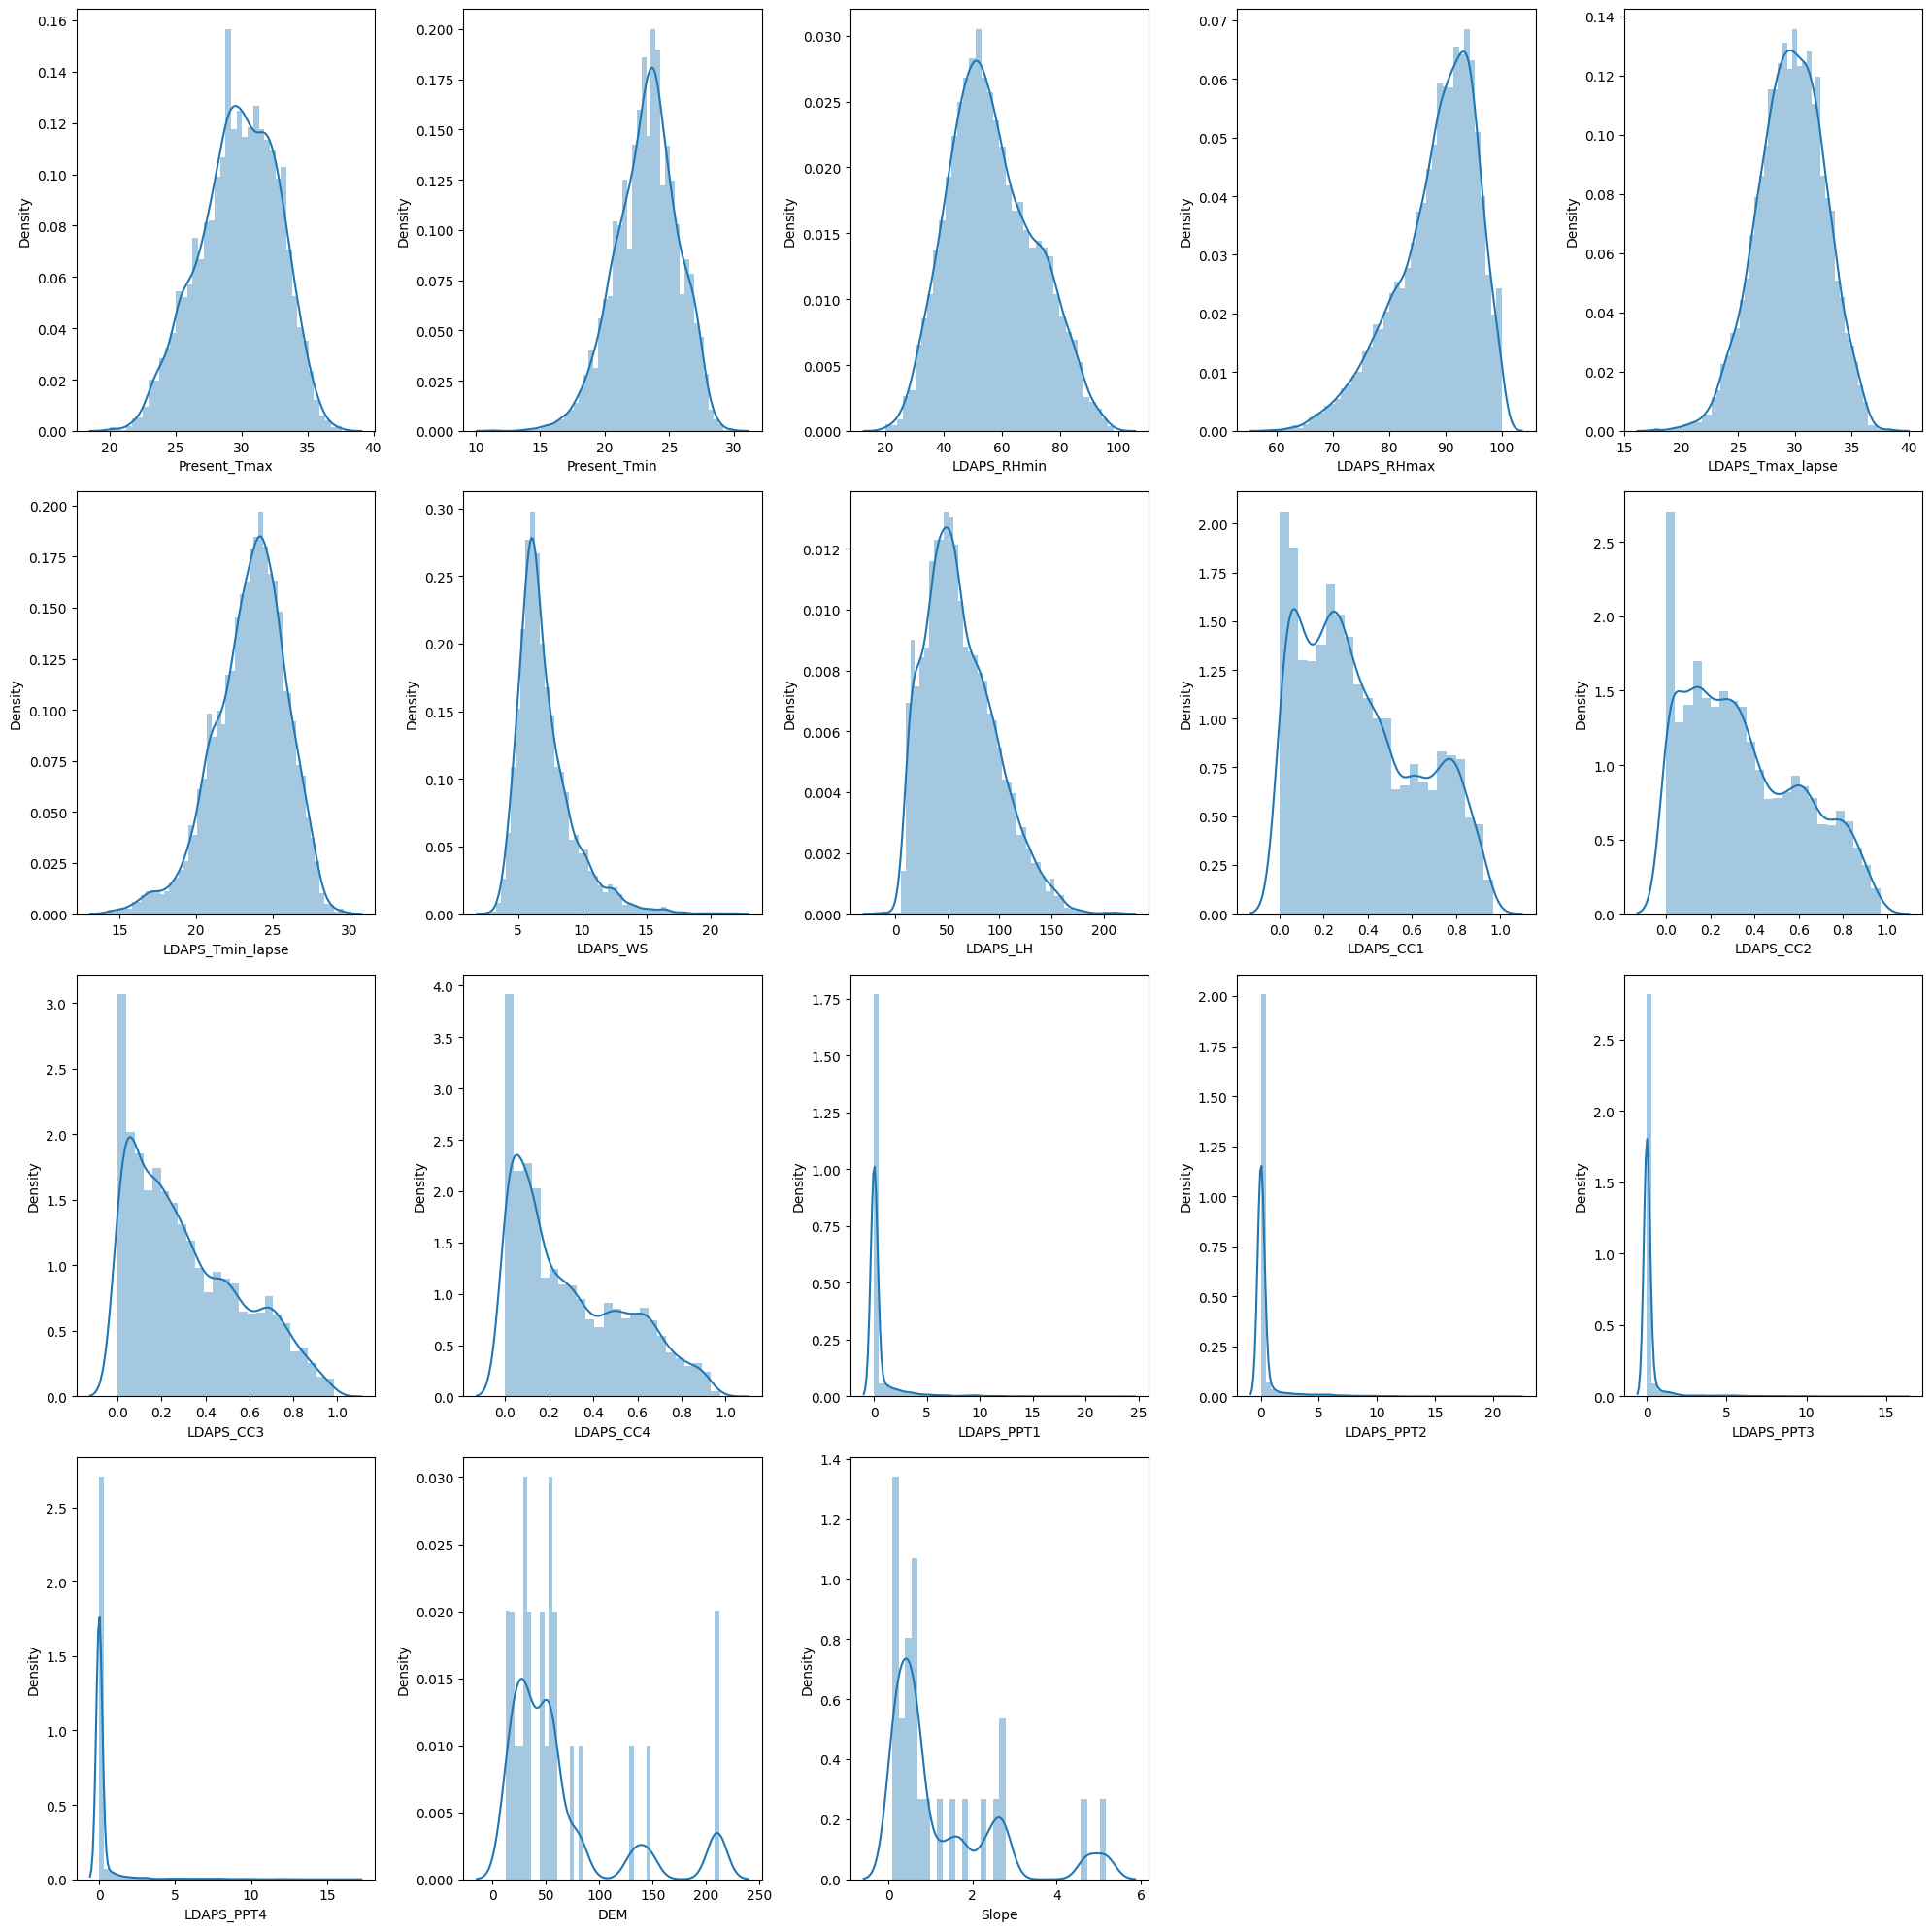

In [15]:
#ploting features distribution
plt.figure( figsize=(20,20))
plotno=1
for i in df.columns[:18]:
  plt.subplot(4,5,plotno)
  sns.distplot(df[i])
  plt.xlabel(i)
  plotno+=1
plt.tight_layout()

LDAPS_RHmax , LDAPS_Tmax_laps and LDAPS_Tmin_laps are left skewed  
LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3 and LDAPS_CC4 are right skewed  
the distribution of LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT4 are not looking good might be huge variation or outluiers present in this features
slope has categorical data

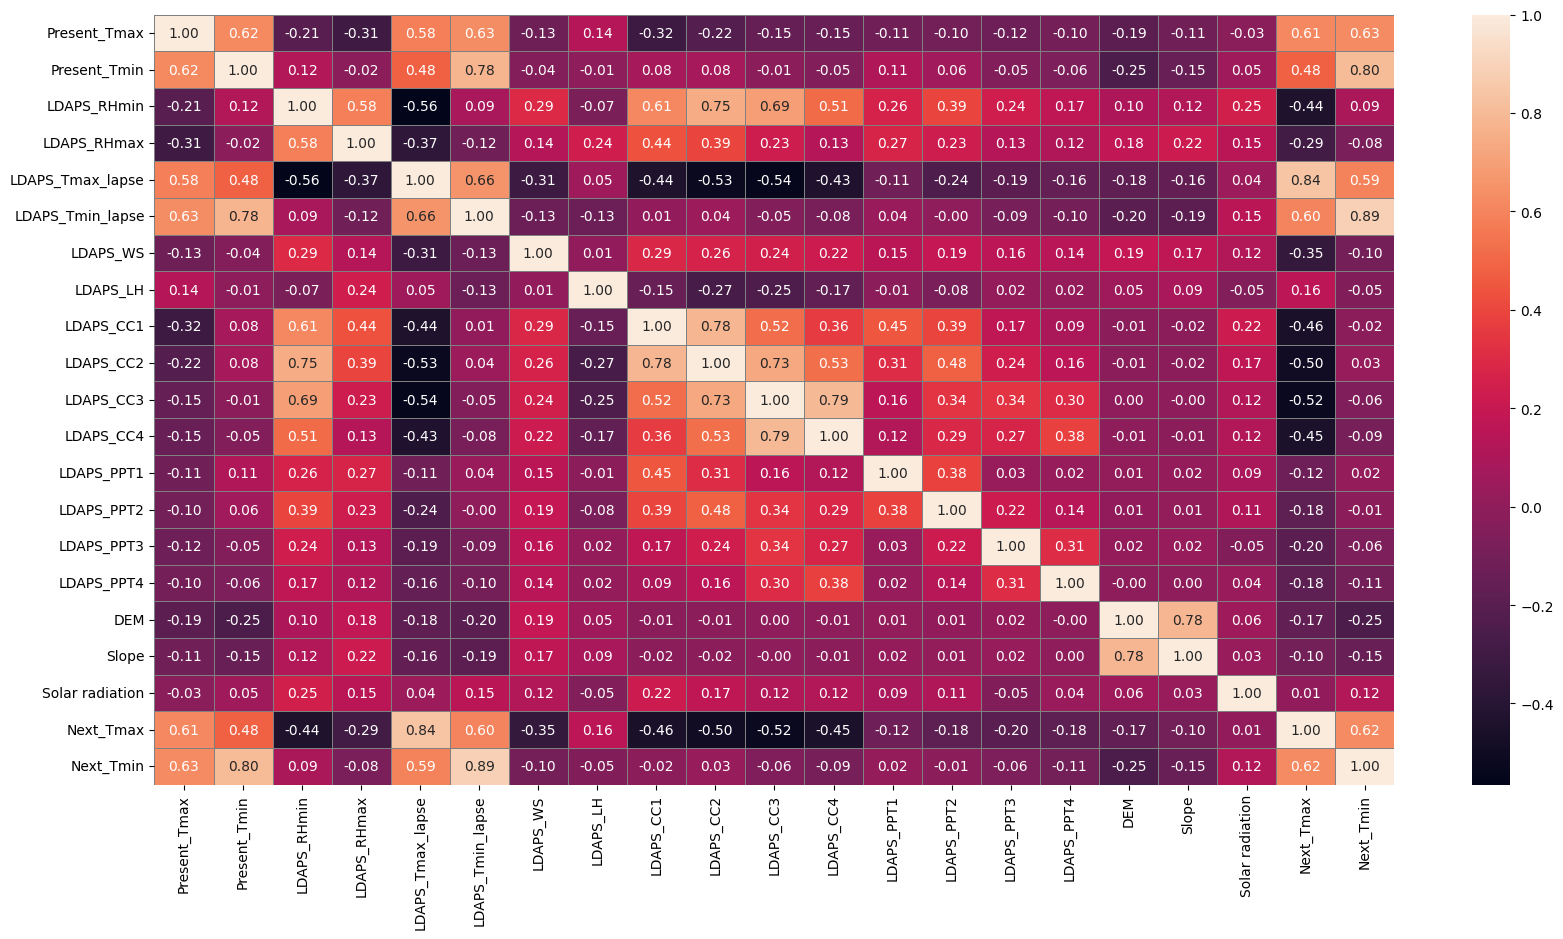

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor='gray', fmt=".2f")
plt.show()

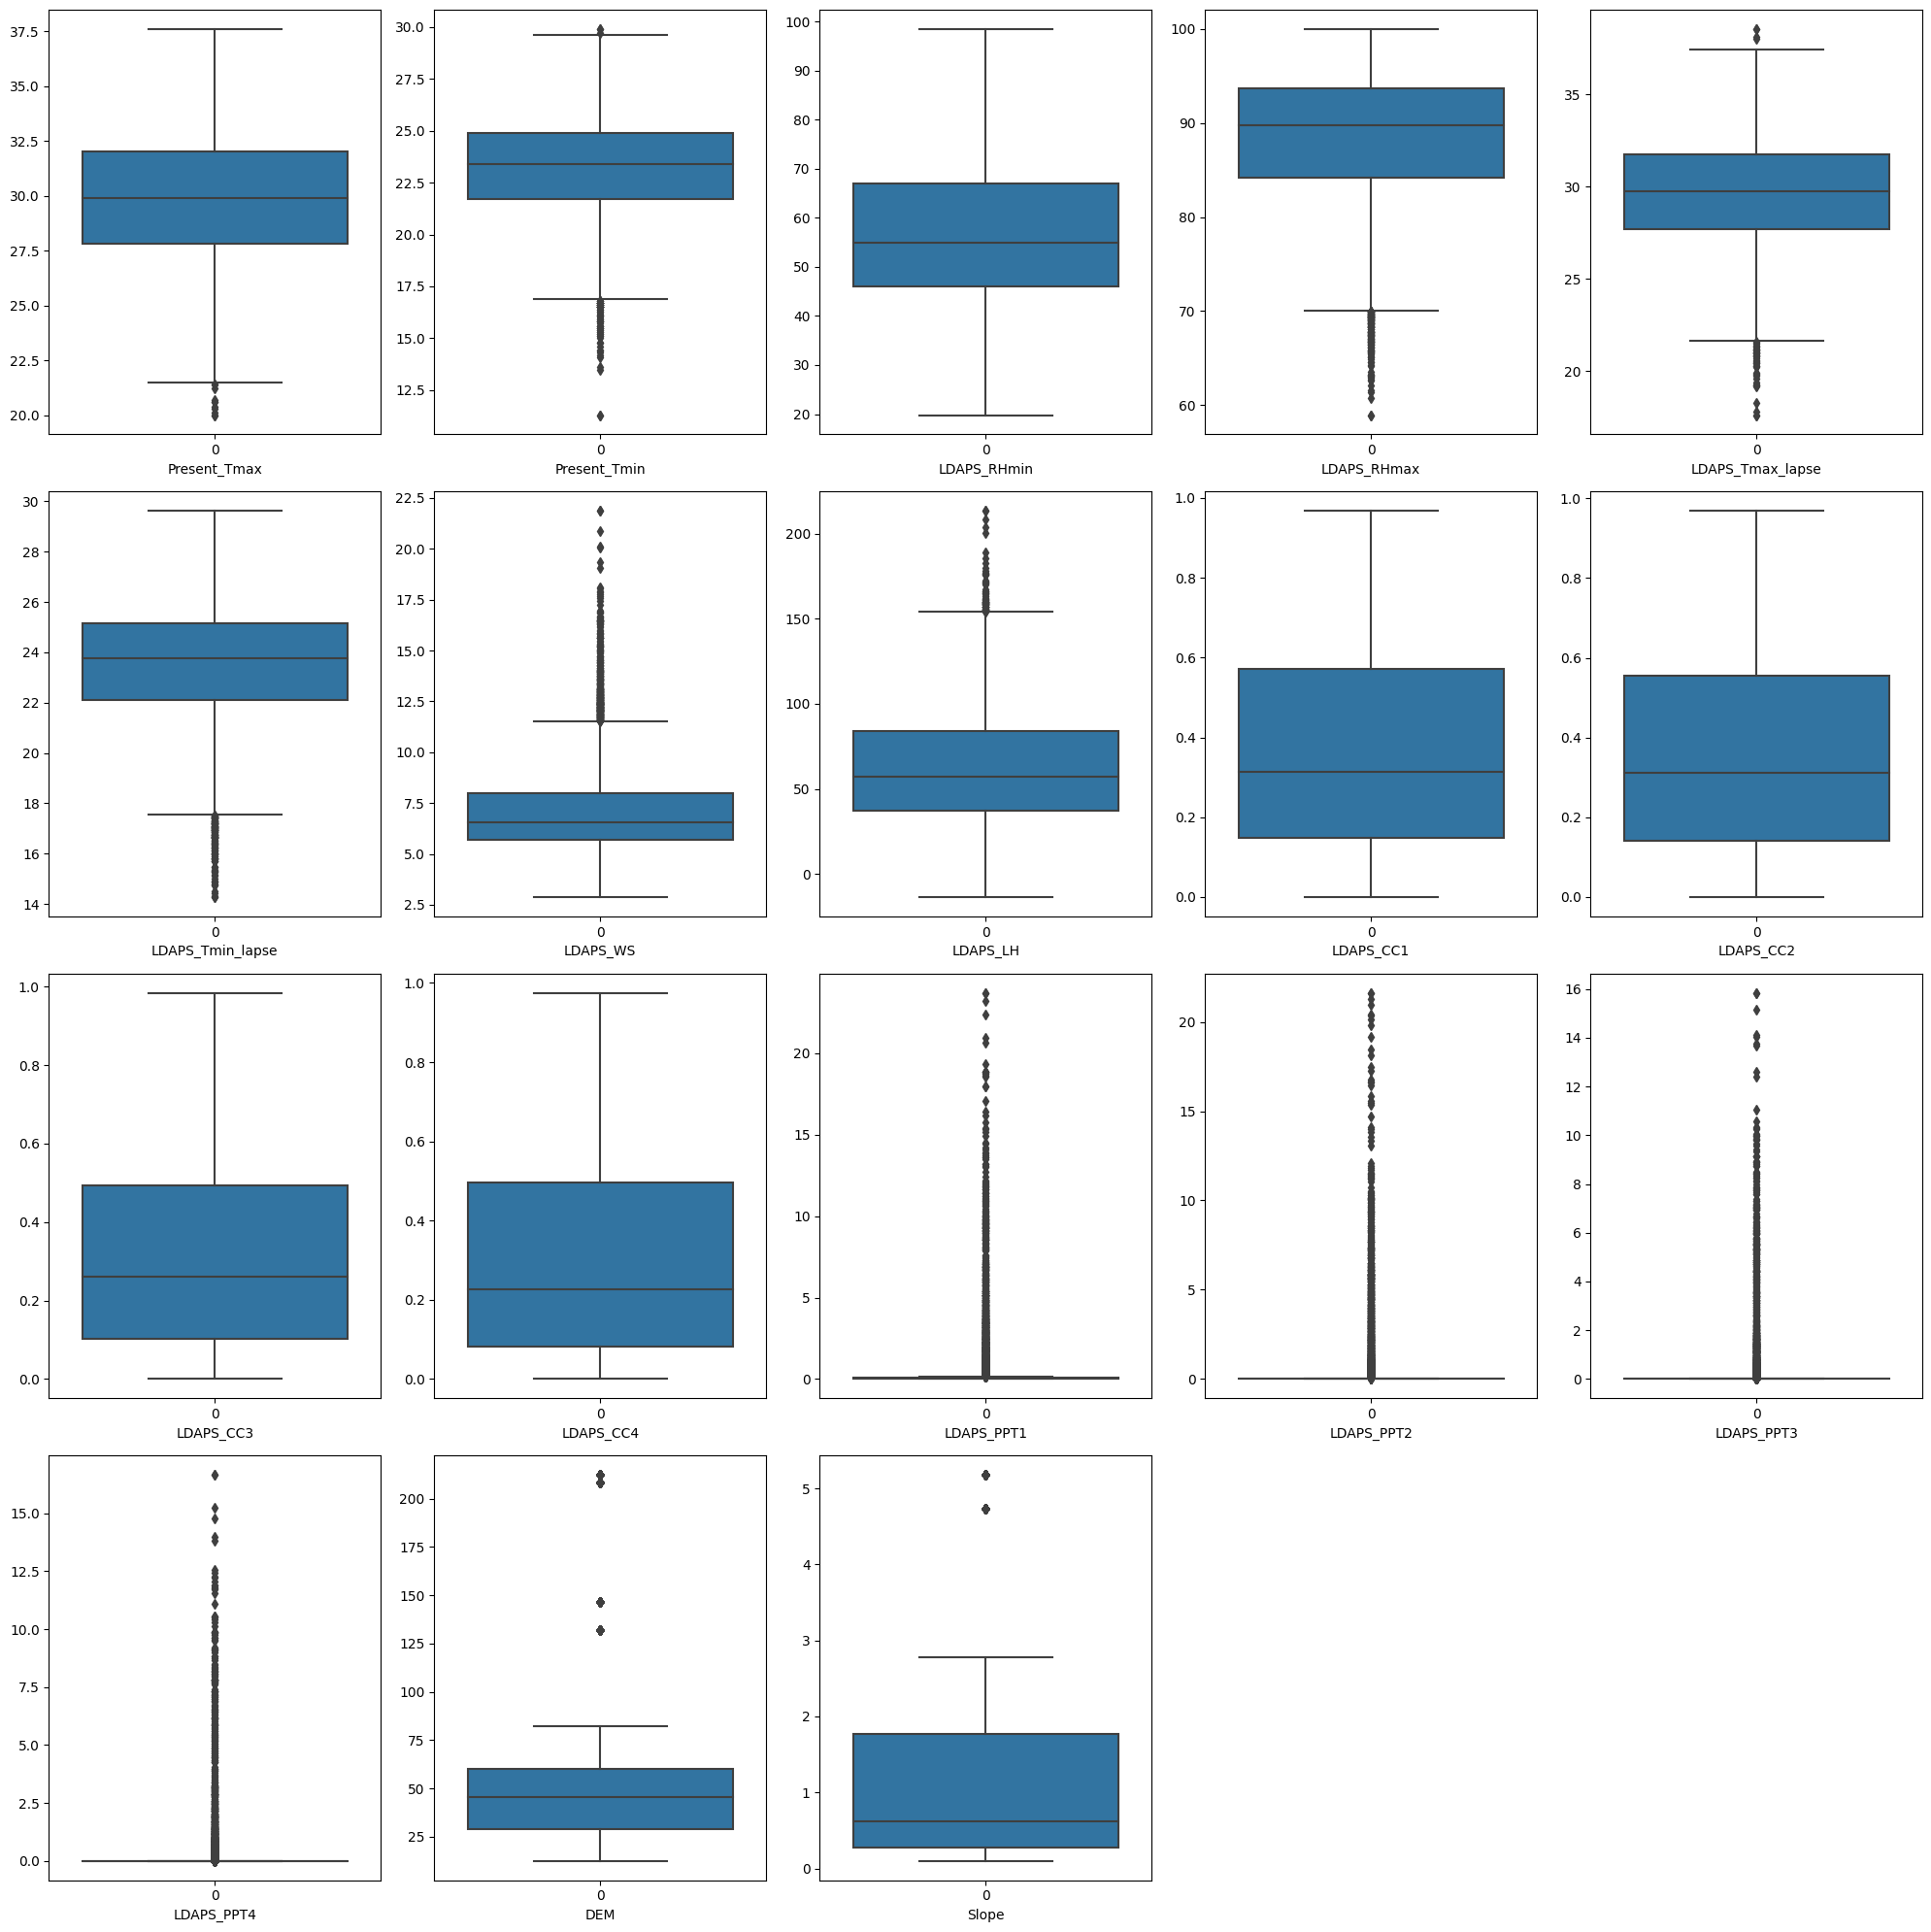

In [17]:
#ploting features distribution
plt.figure( figsize=(20,20))
plotno=1
for i in df.columns[:18]:
  plt.subplot(4,5,plotno)
  sns.boxplot(df[i])
  plt.xlabel(i)
  plotno+=1
plt.tight_layout()

In [18]:
#check skewness
df.skew()

Present_Tmax       -0.263982
Present_Tmin       -0.369313
LDAPS_RHmin         0.305053
LDAPS_RHmax        -0.848014
LDAPS_Tmax_lapse   -0.237828
LDAPS_Tmin_lapse   -0.585586
LDAPS_WS            1.583703
LDAPS_LH            0.666962
LDAPS_CC1           0.466785
LDAPS_CC2           0.479847
LDAPS_CC3           0.649510
LDAPS_CC4           0.672763
LDAPS_PPT1          5.390840
LDAPS_PPT2          5.776419
LDAPS_PPT3          6.453867
LDAPS_PPT4          6.826981
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340471
Next_Tmin          -0.405075
dtype: float64

In [19]:
#removing skewness
for i in df.skew().index[:]:
  if df[i].skew() > 0.5:
    df[i]=np.cbrt(df[i])
  elif(df[i].skew() < (-0.5)):
    df[i]=np.sqrt(df[i])
  else:
    continue

In [20]:
df.skew()

Present_Tmax       -0.263982
Present_Tmin       -0.369313
LDAPS_RHmin         0.305053
LDAPS_RHmax        -0.957379
LDAPS_Tmax_lapse   -0.237828
LDAPS_Tmin_lapse   -0.764461
LDAPS_WS            0.893077
LDAPS_LH           -0.413818
LDAPS_CC1           0.466785
LDAPS_CC2           0.479847
LDAPS_CC3          -0.556134
LDAPS_CC4          -0.453253
LDAPS_PPT1          1.955909
LDAPS_PPT2          2.275819
LDAPS_PPT3          2.572074
LDAPS_PPT4          2.866847
DEM                 0.919779
Slope               0.614110
Solar radiation    -0.559208
Next_Tmax          -0.340471
Next_Tmin          -0.405075
dtype: float64

In [21]:
#removing outliers
zscr=zscore(df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']])
df=df[((np.abs(zscr)) < 3).all(axis=1)]

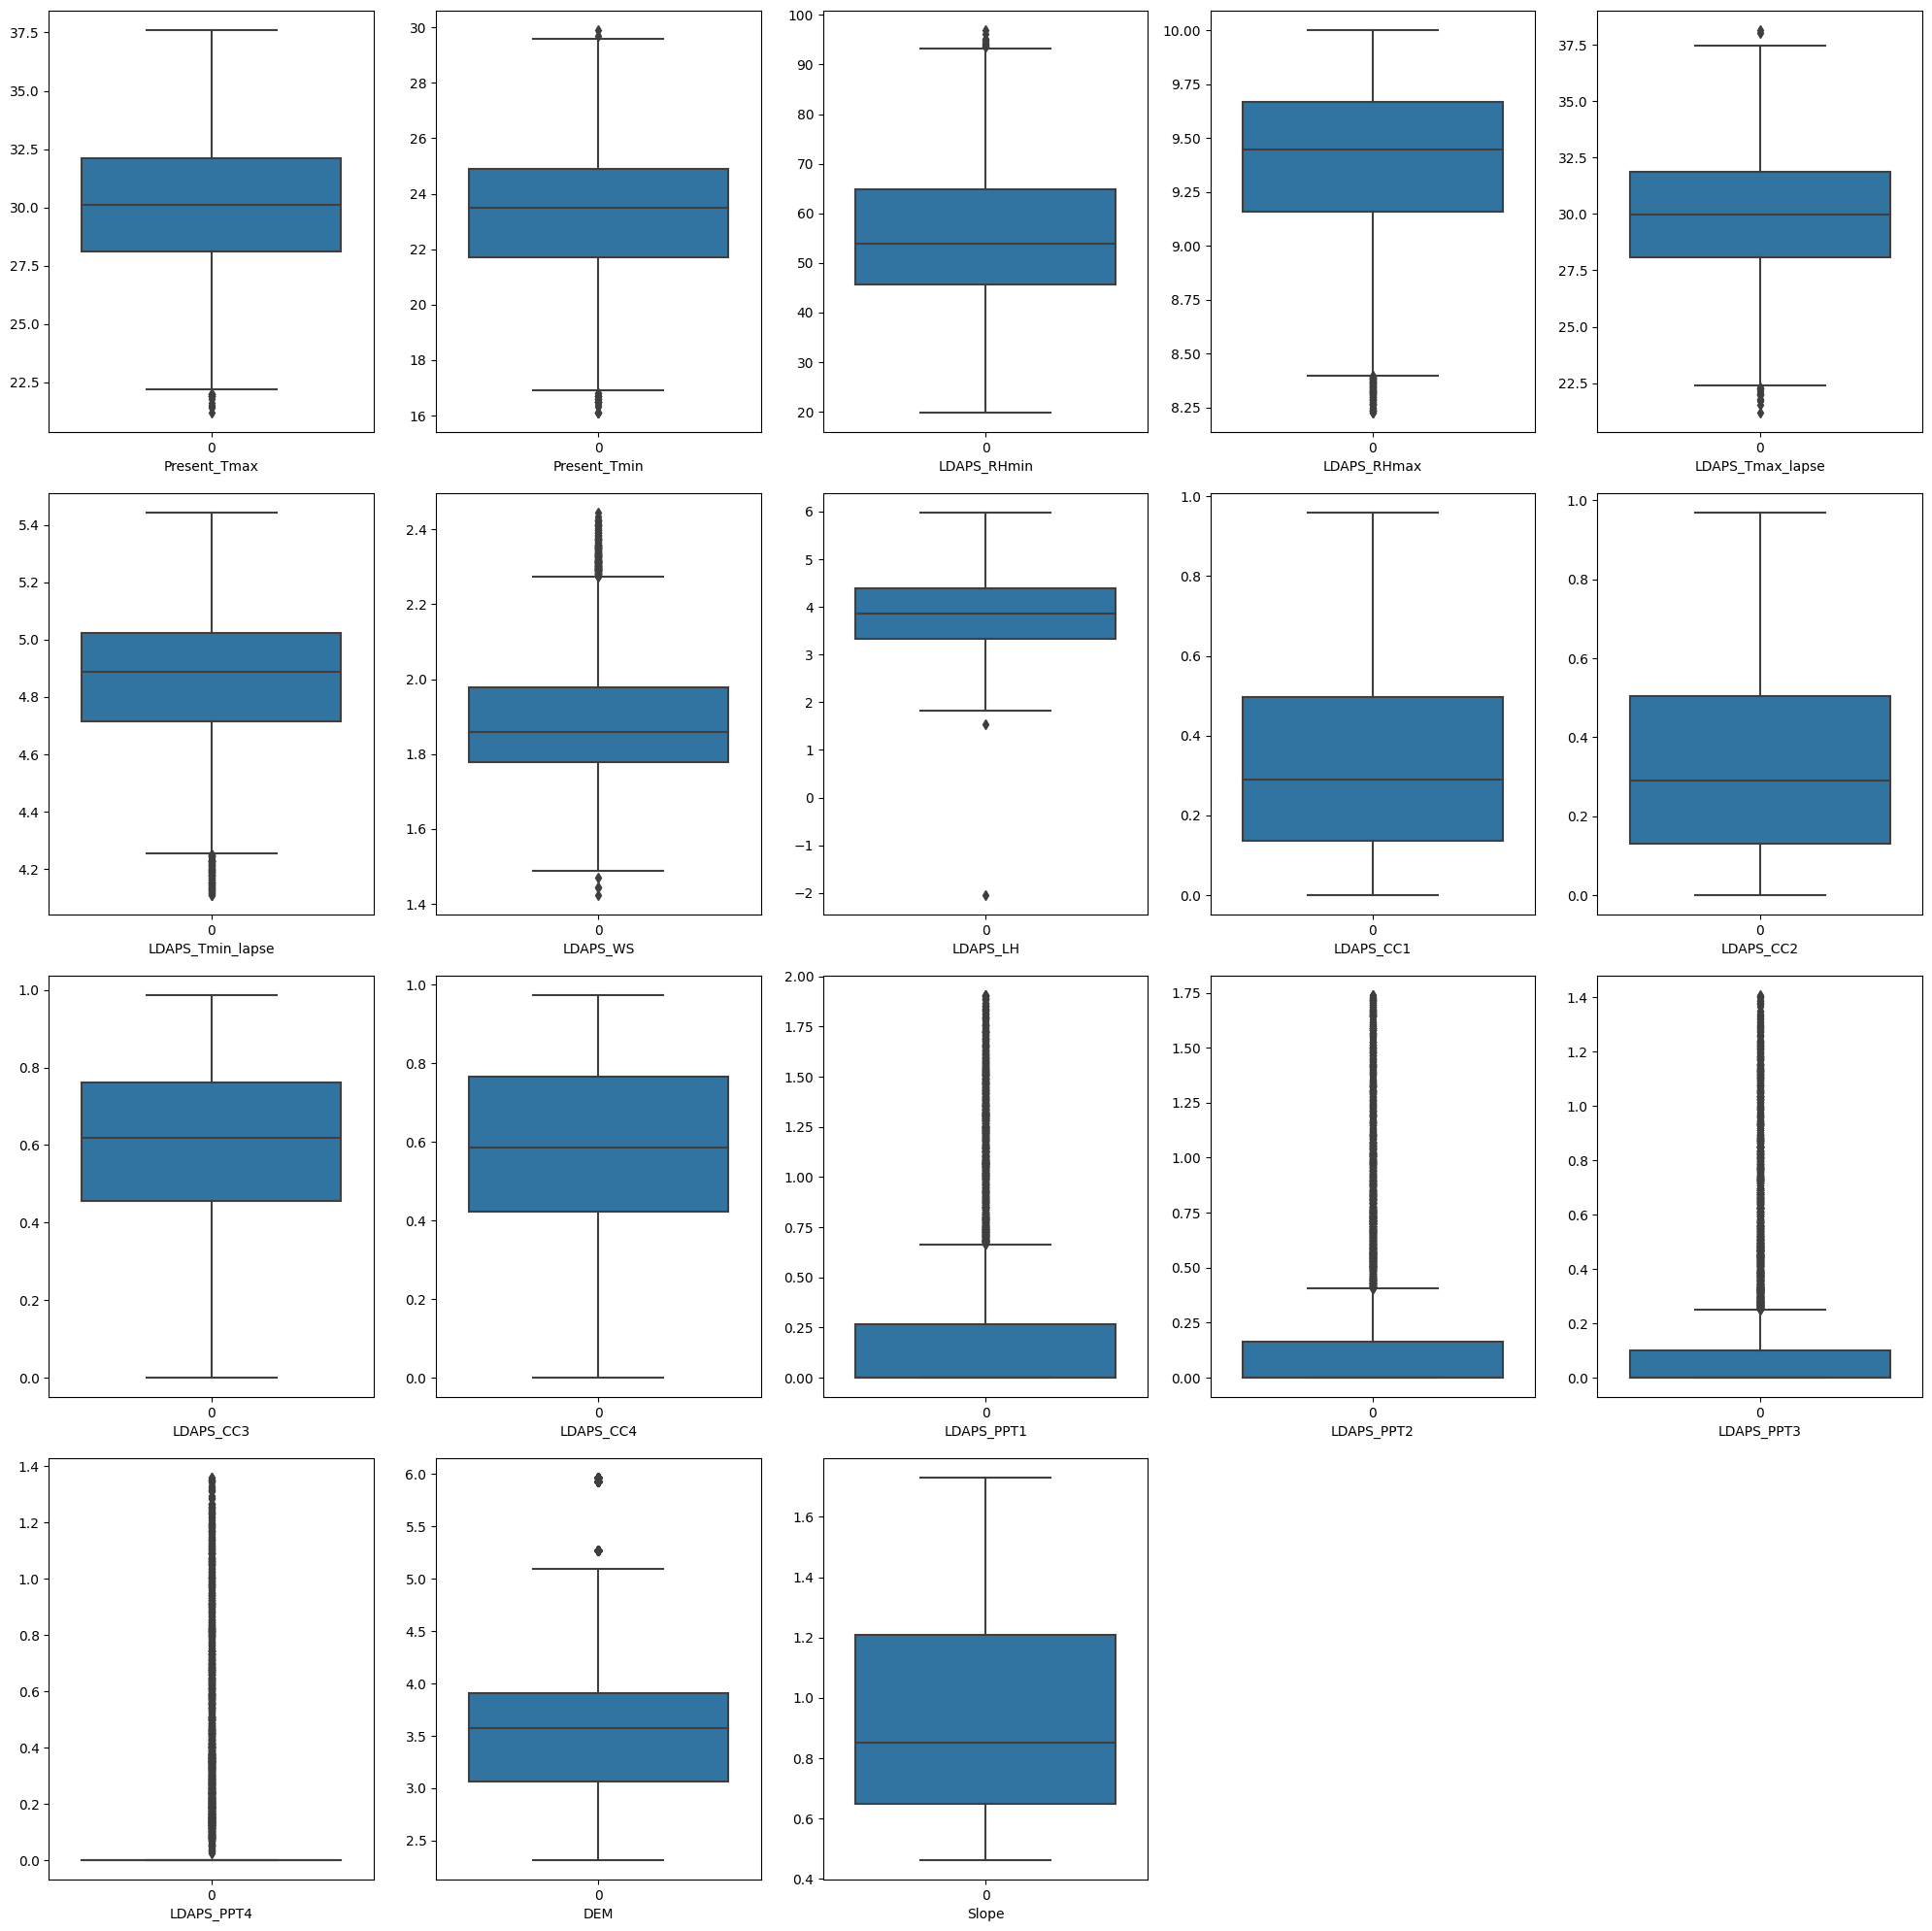

In [22]:
#ploting features distribution
plt.figure( figsize=(20,20))
plotno=1
for i in df.columns[:18]:
  plt.subplot(4,5,plotno)
  sns.boxplot(df[i])
  plt.xlabel(i)
  plotno+=1
plt.tight_layout()

We have managed the outliers at sufficient level

In [23]:
# df.drop(columns=['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4'],axis=1,inplace=True)

In [24]:
#spliting labels and features
X=df.drop(columns=['Next_Tmax','Next_Tmin'],axis=1)
y_max=df['Next_Tmax']
y_min=df['Next_Tmin']


In [25]:
#checking muliticolliniearity
vif=pd.DataFrame()
vif['features']=X.columns
vif['score']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif

,features,score
0,Present_Tmax,294.122348
1,Present_Tmin,307.256428
2,LDAPS_RHmin,75.720059
3,LDAPS_RHmax,671.146555
4,LDAPS_Tmax_lapse,728.845200
5,LDAPS_Tmin_lapse,2327.618723
6,LDAPS_WS,151.216017
7,LDAPS_LH,38.574085
8,LDAPS_CC1,13.530501
9,LDAPS_CC2,15.038856


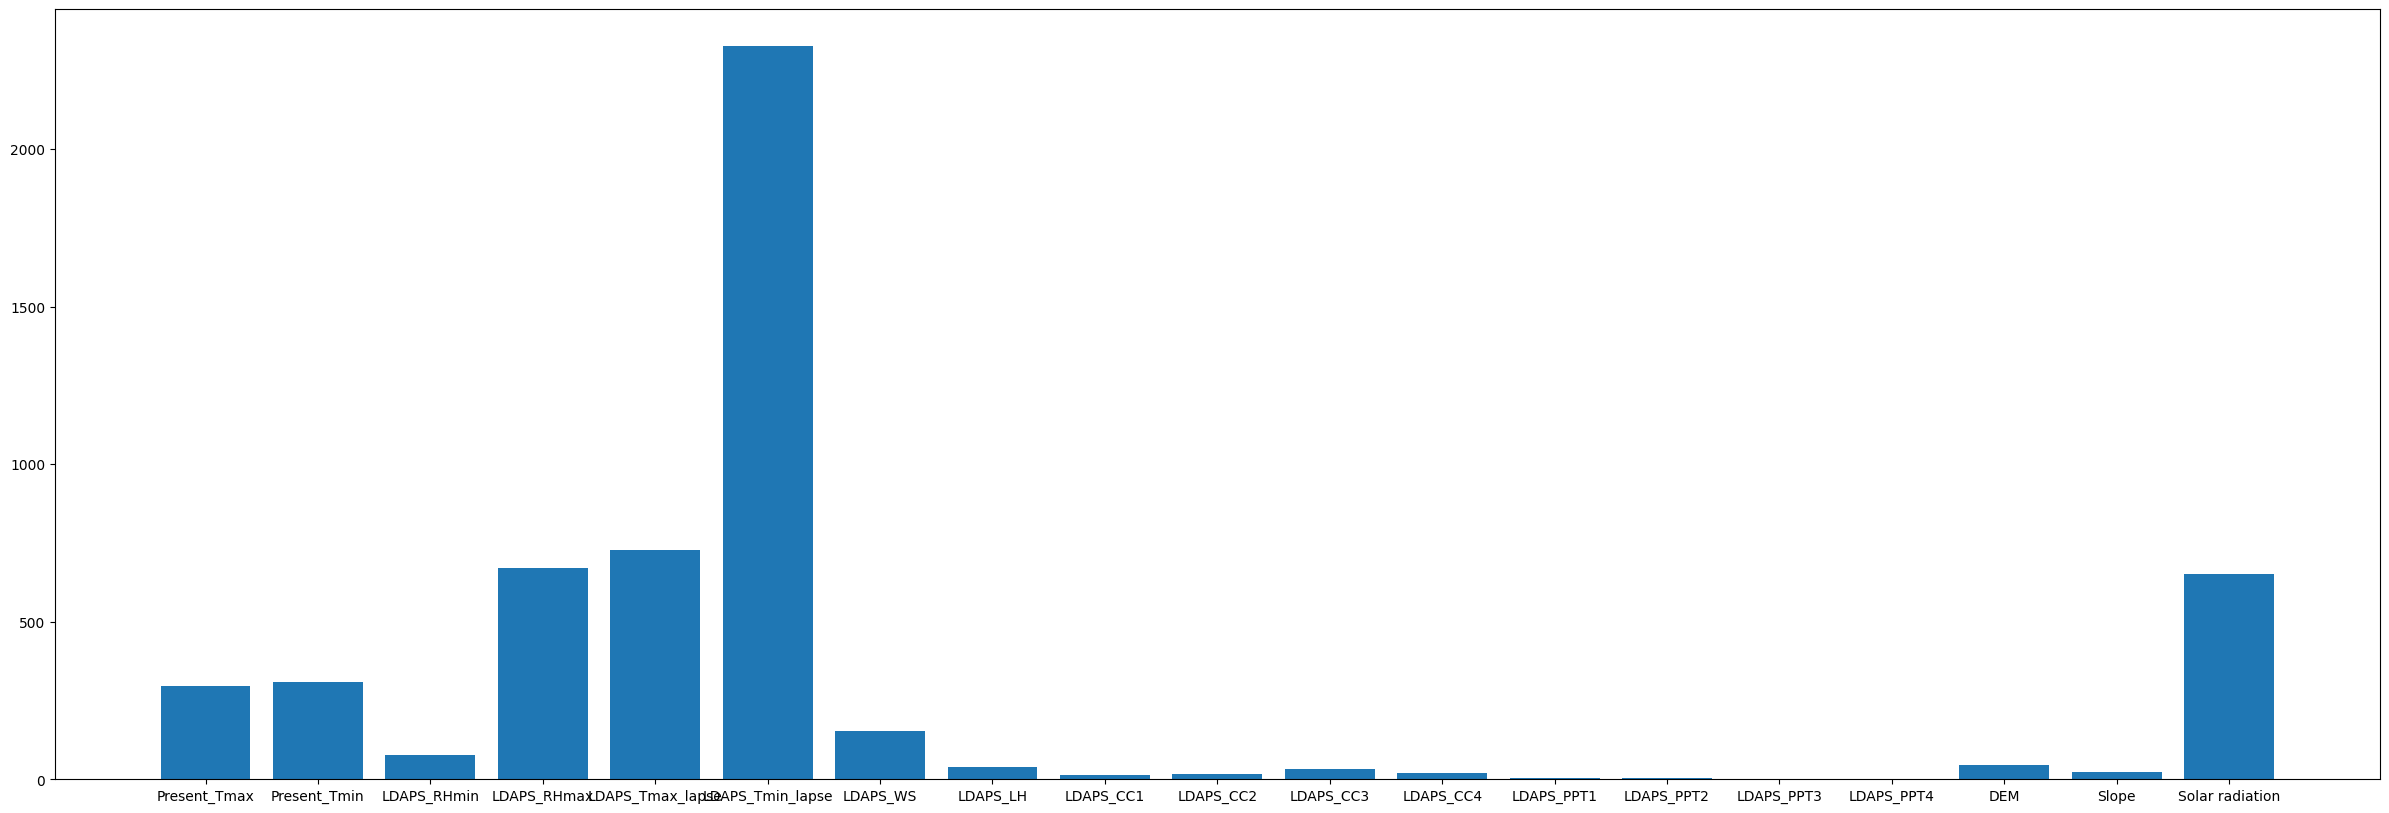

In [26]:
#ploting vif score to visualizing easily  which features has high score
plt.figure(figsize=(30,10))
plt.bar(vif['features'],vif['score'])
plt.show()

In [27]:
#deleting feature with high vif score
df.drop(columns=['LDAPS_Tmin_lapse'],axis=1,inplace=True)

In [28]:
# #selecting best 18 features
# from sklearn.feature_selection import SelectKBest,f_regression
# select=SelectKBest(score_func=f_regression,k=15)
# x_best=select.fit_transform(X,y_min)

In [29]:
#normaliazing scale
scal=StandardScaler()
x_scal=scal.fit_transform(X)

In [30]:
#finding best random state
def random_state(f, l):
    maxscr = 0
    ind = 0
    for i in range(100):
        x_train, x_test, y_train, y_test = train_test_split(f, l, test_size=0.25, random_state=i)
        lr = LinearRegression()
        lr.fit(x_train, y_train)
        scr = r2_score(y_test, lr.predict(x_test))
        if maxscr < scr:
            maxscr = scr
            ind = i
    print(f'maxscore {maxscr} at random state {ind}')
    return ind

In [31]:
ind=random_state(x_scal,y_min)

maxscore 0.8316907202642798 at random state 45


In [32]:
#separating training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_scal, y_min, test_size=0.25, random_state=ind)

In [33]:
#define function to build model
def train_model(alg,x_train,x_test,y_train,y_test):
  alg.fit(x_train,y_train)
  print('-'*15,'Training Score','-'*15)
  ytr_pred=alg.predict(x_train)
  training_score=r2_score(y_train,ytr_pred)
  print(training_score)
  print('-'*15,'Testing Score','-'*15)
  ytest_pred=alg.predict(x_test)
  testing_score=r2_score(y_train,ytr_pred)
  print(testing_score)
  return testing_score

In [34]:
#building linearregression
lr_testing_score=train_model(LinearRegression(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.8148128798826637
--------------- Testing Score ---------------
0.8148128798826637


In [35]:
#building svr
svr_testing_score=train_model(SVR(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.9128424944044985
--------------- Testing Score ---------------
0.9128424944044985


In [36]:
#building Decisiontreeregressor
dtr_testing_score=train_model(DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
1.0
--------------- Testing Score ---------------
1.0


In [37]:
#building ExtraTreeRegressor
etr_testing_score=train_model(ExtraTreeRegressor(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
1.0
--------------- Testing Score ---------------
1.0


In [38]:
#building Randomforestregressor
rfr_testing_score=train_model(RandomForestRegressor(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.9842612886154535
--------------- Testing Score ---------------
0.9842612886154535


In [39]:
#building AdaBoostRegressor
adr_testing_score=train_model(AdaBoostRegressor(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.7930747272330219
--------------- Testing Score ---------------
0.7930747272330219


In [40]:
#building GradientBoostingRegressor
gbr_testing_score=train_model(GradientBoostingRegressor(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.8984898551587368
--------------- Testing Score ---------------
0.8984898551587368


In [41]:
#building XGBRegressor
xgbr_testing_score=train_model(XGBRegressor(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.9934344823704991
--------------- Testing Score ---------------
0.9934344823704991


**Cross Validation**

In [42]:
def cross_check(alg,x,y,testing_score):
  cv=cross_val_score(alg,x,y,cv=10)
  print('CV Mean                    testing score                         difference')
  print(f'{round(cv.mean(),2)*100}                            {round(testing_score,2)*100}                                {round(((cv.mean()*100)-(testing_score*100)),2)}')

In [43]:
#cross validation of LinearRegression
cross_check(LinearRegression(),x_train,y_train,lr_testing_score)

CV Mean                    testing score                         difference
81.0                            81.0                                -0.31


In [44]:
#cross validation of SVR
cross_check(SVR(),x_train,y_train,svr_testing_score)

CV Mean                    testing score                         difference
88.0                            91.0                                -2.84


In [45]:
#cross validaiton of DecisionTreeRegressor
cross_check(DecisionTreeRegressor(),x_train,y_train,dtr_testing_score)

CV Mean                    testing score                         difference
75.0                            100.0                                -25.08


In [46]:
#cross validation of ExtraaTreeRegressor
cross_check(ExtraTreeRegressor(),x_train,y_train,etr_testing_score)

CV Mean                    testing score                         difference
73.0                            100.0                                -27.14


In [47]:
#cross validation randomforestregressor
cross_check(RandomForestRegressor(),x_train,y_train,rfr_testing_score)

CV Mean                    testing score                         difference
89.0                            98.0                                -9.85


In [48]:
#cross validation AdaBoostRegressor
cross_check(AdaBoostRegressor(),x_train,y_train,adr_testing_score)

CV Mean                    testing score                         difference
78.0                            79.0                                -0.85


In [49]:
#cross validation of GradienBoostingRegressor
cross_check(GradientBoostingRegressor(),x_train,y_train,gbr_testing_score)

CV Mean                    testing score                         difference
87.0                            90.0                                -2.47


In [50]:
#XGBRegressor
cross_check(XGBRegressor(),x_train,y_train,xgbr_testing_score)

CV Mean                    testing score                         difference
92.0                            99.0                                -7.62


As per evaluation LinearRegression is well generalized model and also gradientboostingregressor might overfit, but will check it after parameter tunning is it predicitng accurate or not then we will make choice

In [ ]:
param_grid = {
    'learning_rate': [1,0.1, 0.01, 0.02],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 3, 5],
}
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [1, 0.1, 0.01, 0.02],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [ ]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 5,
 'n_estimators': 300}

In [51]:
#training model
tunned_gbr=GradientBoostingRegressor(learning_rate=0.1,max_depth=5,min_samples_leaf=5,n_estimators=300)
tunned_gbr.fit(x_train,y_train)
y_pred=tunned_gbr.predict(x_test)
print('Testing Score: ',r2_score(y_test,y_pred))

Testing Score:  0.9309194493597001


In [52]:
#cross validating tunned model
cross_val_score(GradientBoostingRegressor(learning_rate=0.1,max_depth=5,min_samples_leaf=5,n_estimators=300),x_train,y_train).mean()

0.9233573219482608

Now it looks perfect model is well generalized

In [53]:
#model saving
import pickle as pkl
pkl.dump(tunned_gbr,open('Tmin_pred_gbr.sav','wb'))

In [54]:
#loading model
Tmin_model=pkl.load(open('Tmin_pred_gbr.sav','rb'))

In [55]:
#comparing original and predicted label
cmp_df=pd.DataFrame()
cmp_df['Org_Tmin']=y_test
cmp_df['pred_Tmin']=Tmin_model.predict(x_test)
cmp_df

,Org_Tmin,pred_Tmin
1684,18.7,19.709227
405,23.9,23.744275
6513,23.2,23.847922
641,20.9,21.805911
4469,23.2,21.958408
...,...,...
6607,23.6,24.082911
1819,22.2,22.272660
894,25.3,24.939542
5795,27.0,26.136607


# Predicting Next_Tmax

In [56]:
ind1=random_state(x_scal,y_max)

maxscore 0.776938689072057 at random state 25


In [57]:
x_train, x_test, y_train, y_test=None,None,None,None

In [58]:
#separating training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_scal, y_max, test_size=0.25, random_state=ind1)

In [59]:
#building linearregression
lr2_testing_score=train_model(LinearRegression(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.7434150620253483
--------------- Testing Score ---------------
0.7434150620253483


In [60]:
#building svr
svr2_testing_score=train_model(SVR(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.8804895714346961
--------------- Testing Score ---------------
0.8804895714346961


In [61]:
#building Decisiontreeregressor
dtr2_testing_score=train_model(DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
1.0
--------------- Testing Score ---------------
1.0


In [62]:
#building ExtraTreeRegressor
etr2_testing_score=train_model(ExtraTreeRegressor(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
1.0
--------------- Testing Score ---------------
1.0


In [63]:
#building Randomforestregressor
rfr2_testing_score=train_model(RandomForestRegressor(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.9821656536558531
--------------- Testing Score ---------------
0.9821656536558531


In [64]:
#building AdaBoostRegressor
adr2_testing_score=train_model(AdaBoostRegressor(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.7468677325293378
--------------- Testing Score ---------------
0.7468677325293378


In [65]:
#building GradientBoostingRegressor
gbr2_testing_score=train_model(GradientBoostingRegressor(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.8540732410720888
--------------- Testing Score ---------------
0.8540732410720888


In [66]:
#building XGBRegressor
xgbr2_testing_score=train_model(XGBRegressor(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.9908501658698732
--------------- Testing Score ---------------
0.9908501658698732


**Cross Validation**

In [67]:
#cross validation of LinearRegression
cross_check(LinearRegression(),x_train,y_train,lr2_testing_score)

CV Mean                    testing score                         difference
74.0                            74.0                                -0.28


In [68]:
#cross validation of SVR
cross_check(SVR(),x_train,y_train,svr2_testing_score)

CV Mean                    testing score                         difference
85.0                            88.0                                -2.84


In [69]:
#cross validaiton of DecisionTreeRegressor
cross_check(DecisionTreeRegressor(),x_train,y_train,dtr2_testing_score)

CV Mean                    testing score                         difference
72.0                            100.0                                -28.16


In [70]:
#cross validation of ExtraaTreeRegressor
cross_check(ExtraTreeRegressor(),x_train,y_train,etr2_testing_score)

CV Mean                    testing score                         difference
70.0                            100.0                                -30.43


In [71]:
#cross validation randomforestregressor
cross_check(RandomForestRegressor(),x_train,y_train,rfr2_testing_score)

CV Mean                    testing score                         difference
87.0                            98.0                                -11.28


In [72]:
#cross validation AdaBoostRegressor
cross_check(AdaBoostRegressor(),x_train,y_train,adr2_testing_score)

CV Mean                    testing score                         difference
73.0                            75.0                                -1.83


In [73]:
#cross validation of GradienBoostingRegressor
cross_check(GradientBoostingRegressor(),x_train,y_train,gbr2_testing_score)

CV Mean                    testing score                         difference
82.0                            85.0                                -3.3


In [74]:
#cross validation of XGBRegressor
cross_check(XGBRegressor(),x_train,y_train,xgbr2_testing_score)

CV Mean                    testing score                         difference
89.0                            99.0                                -9.65


XGBRegressor has good cross validation score so I am considering it for tunning and again cross valiadtion if it works well after tunning then I will choose that one only else other option

In [ ]:
 #parameter tunning for xgbregressor
param_grid={'n_estimators':[100,200,300],
             'eta':[0.01,0.1,1],
             'subsample':[0.6,0.8,1],
             'colsample_bytree':[0.7,0.9,1]
             }
tune_xgb=GridSearchCV(estimator=XGBRegressor(),param_grid=param_grid,scoring='r2',cv=5)
tune_xgb.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.9, 1],
                         'eta': [0.01, 0.1, 1], 'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1]},
             scoring='r2')

In [ ]:
tune_xgb.best_params_

{'colsample_bytree': 0.9, 'eta': 0.1, 'n_estimators': 300, 'subsample': 0.6}

In [75]:
tunned_xgb=XGBRegressor(colsample_bytree= 0.9,eta=0.1,n_estimators=300,subsample=0.6)
tunned_xgb.fit(x_train,y_train)
ymax_pred=tunned_xgb.predict(x_test)
r2=r2_score(y_test,ymax_pred)
print(r2)

0.9214308354571785


In [76]:
#cross validation of XGBRegressor
cross_check(XGBRegressor(colsample_bytree= 0.9,eta=0.1,n_estimators=300,subsample=0.6),x_train,y_train,r2)

CV Mean                    testing score                         difference
91.0                            92.0                                -1.4


After tunning xgbregressor is well generalized so I am saving this one as final model to predict the next day maximum temerature

In [77]:
#model saving
import pickle as pkl
pkl.dump(tunned_xgb,open('Tmax_pred_xgbr.sav','wb'))

In [78]:
#loading model
model_tmax=pkl.load(open('Tmax_pred_xgbr.sav','rb'))

In [80]:
#comparing actaul next day maximum temperature with predicted
Tmax_cmp_df=pd.DataFrame()
Tmax_cmp_df['Next_Tmax']=y_test
Tmax_cmp_df['pred_Next_Tmax']=model_tmax.predict(x_test)
Tmax_cmp_df

,Next_Tmax,pred_Next_Tmax
7505,32.6,31.890560
120,30.4,30.772928
88,27.5,27.741516
7027,32.9,32.963226
600,27.7,26.570538
...,...,...
808,30.3,30.854189
5719,35.8,35.391216
6429,26.2,27.827885
5102,32.9,32.803452
